# Deep Learning

## Part 1: Image Classification - CIFAR-10 (CNN)

---
> Kostis Konstantinos (p3352311) <br>
> Karousis Nikolaos (p3352321) <br>
> MSc Data Science (Part-Time) <br>
> Athens University Of Economics and Business

In [2]:
# Install needed libraries
!pip install keras-tuner==1.4.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


## Access to code

In [3]:
import sys
import os
from google.colab import drive

# Mount the drive
drive.mount('/content/drive', force_remount=True)

# Define the base path
base_path = '/content/drive/MyDrive/deep-learning-msc-data-science-2024-2025'

# Define the code path
code_folder = os.path.join(base_path, 'code')

# Add the 'code' folder to the sys.path
sys.path.append(code_folder)

Mounted at /content/drive


In [4]:
# Load necessary libs and modules
from constants import *
from cnn import CNNTuner, CNN

## Load Dataset

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.cifar10.load_data()

num_classes = len(CIFAR_10_CLASS_IDS)
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

# Split the training data into training and validation sets (10% for validation)
train_X, validation_X, train_y, validation_y = train_test_split(
    train_X, train_y, test_size=0.1, random_state=42
)

# Ensure the splits are correctly made
print('Train Images:', train_X.shape)
print('Train Labels:', train_y.shape)
print('Validation Images:', validation_X.shape)
print('Validation Labels:', validation_y.shape)
print('Test Images:', test_X.shape)
print('Test Labels:', test_y.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Train Images: (45000, 32, 32, 3)
Train Labels: (45000, 10)
Validation Images: (5000, 32, 32, 3)
Validation Labels: (5000, 10)
Test Images: (10000, 32, 32, 3)
Test Labels: (10000, 10)


### CNN Hyper-Parameter tuning

In [6]:
tuner_directory = os.path.join(base_path, TUNERS_DIR)
cifar_cnn_tuner = CNNTuner((train_X, train_y), (validation_X, validation_y),
                             tuner_directory, CIFAR_10_CNN_TUNER_PROJECT_NAME,
                             train_size=0.5)

In [7]:
cifar_cnn_keras_tuner = cifar_cnn_tuner.tune(epochs=10, batch_size=32)

Reloading Tuner from /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/tuners/cifar_10_cnn/tuner0.json


In [8]:
cifar_cnn_best_hyperparams = cifar_cnn_keras_tuner.get_best_hyperparameters()[0].values
cifar_cnn_best_hyperparams

{'kernel_size': 3,
 'kernel_stride': 1,
 'conv_filters': 96,
 'conv_activation': 'tanh',
 'num_layers': 1,
 'layer_0_kernel_size': 3,
 'layer_0_kernel_stride': 2,
 'layer_0_pool_size': 2,
 'layer_0_dropout': 0.25,
 'conv2dblock_0_filters': 32,
 'conv2dblock_0_activation': 'tanh',
 'dense_units': 192,
 'dense_dropout': 0.30000000000000004,
 'learning_rate': 0.0001,
 'layer_1_kernel_size': 3,
 'layer_1_kernel_stride': 2,
 'layer_1_pool_size': 2,
 'layer_1_dropout': 0.4,
 'conv2dblock_1_filters': 64,
 'conv2dblock_1_activation': 'tanh',
 'layer_2_kernel_size': 3,
 'layer_2_kernel_stride': 2,
 'layer_2_pool_size': 2,
 'layer_2_dropout': 0.30000000000000004,
 'conv2dblock_2_filters': 32,
 'conv2dblock_2_activation': 'tanh'}

In [9]:
cifar_cnn_keras_tuner.get_best_models()[0].summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_block (Conv2DBlock)           │ (None, 8, 8, 32)            │          27,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 192)                 │         393,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,706 (1.62 MB)

 Trainable params: 425,706 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

### Fit the CNN

In [10]:
models_directory = os.path.join(base_path, MODELS_DIR)
cifar_cnn = CNN(models_dir=models_directory, weights_name=CIFAR_10_CNN_WEIGHTS,
                  class_ids=CIFAR_10_CLASS_IDS, class_labels=CIFAR_10_CLASS_LABELS)

In [11]:
cifar_cnn.fit(train_dataset=(train_X, train_y), validation_dataset=(validation_X, validation_y), hyperparams=cifar_cnn_best_hyperparams)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
 — val_f1: 0.445109 — val_precision: 0.449116 — val_recall: 0.457200

Epoch 1: val_f1 improved from -inf to 0.44511, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_cnn.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 138s 384ms/step - categorical_accuracy: 0.2470 - loss: 2.0693 - val_categorical_accuracy: 0.4572 - val_loss: 1.5283 - val_f1: 0.4451 - val_recall: 0.4572 - val_precision: 0.4491
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
 — val_f1: 0.504332 — val_precision: 0.510525 — val_recall: 0.515400

Epoch 2: val_f1 improved from 0.44511 to 0.50433, saving model to /content/drive/MyDrive/deep-learning-msc-data-science-2024-2025/models/cifar_10_cnn.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 124s 353ms/step - categorical_accuracy: 0.4325 - loss: 1.5659 - val_categorical_accuracy: 0.5154 - val_loss: 1.3742 - val_f1: 0.5043 - val_recall: 0.5154 - val_precision: 0.5105
Epoch 3/100
157/157

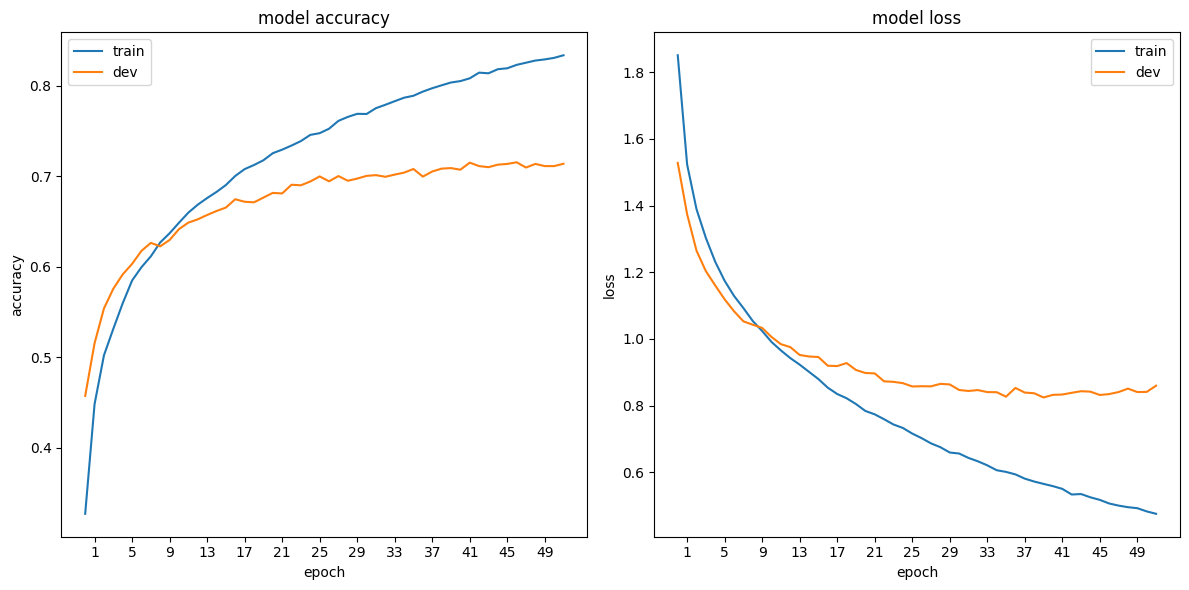

In [12]:
cifar_cnn.plot_curves()

### Evaluating the CNN on the training set (Classification Report)

In [13]:
train_classification_report_df, train_macro_average_df = cifar_cnn.classification_report((train_X, train_y))

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step


In [14]:
train_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.894782,0.913572,0.904080,0.969965
1,1,automobile,0.973411,0.957235,0.965255,0.994154
2,2,bird,0.876294,0.813995,0.843996,0.930772
3,3,cat,0.859552,0.831137,0.845106,0.924550
4,4,deer,0.887118,0.875720,0.881382,0.947235
5,5,dog,0.872666,0.862767,0.867688,0.940340
6,6,frog,0.919595,0.944850,0.932052,0.981025
7,7,horse,0.953271,0.908484,0.930339,0.979665
8,8,ship,0.874549,0.970425,0.919996,0.984885
9,9,truck,0.932243,0.963111,0.947426,0.989210


In [15]:
train_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.904348,0.90413,0.903732,0.96418


### Evaluating the CNN on the validation set (Classification Report)

In [17]:
val_classification_report_df, val_macro_average_df = cifar_cnn.classification_report((validation_X, validation_y))

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [18]:
val_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.716298,0.747899,0.731757,0.823054
1,1,automobile,0.855895,0.804928,0.829630,0.907156
2,2,bird,0.681720,0.601518,0.639113,0.709379
3,3,cat,0.565574,0.527725,0.545994,0.600697
4,4,deer,0.663202,0.656379,0.659772,0.722203
5,5,dog,0.614919,0.605159,0.610000,0.664417
6,6,frog,0.762000,0.785567,0.773604,0.871069
7,7,horse,0.805846,0.758350,0.781377,0.870310
8,8,ship,0.726813,0.856859,0.786496,0.898288
9,9,truck,0.756906,0.822000,0.788111,0.872112


In [19]:
val_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.714917,0.716638,0.714585,0.793868


### Evaluating the CNN on the test set (Classification Report)

In [20]:
test_classification_report_df, test_macro_average_df = cifar_cnn.classification_report((test_X, test_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [21]:
test_classification_report_df

,Class Id,Class Name,Precision,Recall,F1,Precision-Recall AUC
0,0,airplane,0.740814,0.746,0.743398,0.825770
1,1,automobile,0.837233,0.823,0.830055,0.911761
2,2,bird,0.645125,0.569,0.604676,0.674995
3,3,cat,0.530335,0.507,0.518405,0.566717
4,4,deer,0.670490,0.643,0.656457,0.711242
5,5,dog,0.599385,0.585,0.592105,0.659099
6,6,frog,0.760589,0.826,0.791946,0.866029
7,7,horse,0.809836,0.741,0.773890,0.854382
8,8,ship,0.741379,0.860,0.796296,0.892751
9,9,truck,0.752788,0.810,0.780347,0.873730


In [22]:
test_macro_average_df

,Macro Average Precision,Macro Average Recall,Macro Average F1,Macro Average Precision Recall AUC
0,0.708797,0.711,0.708758,0.783648
